![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Proyecto final - Data Analytics y Business Intelligence

Recibimos dos datasets:

1. `renfe.csv`: Información de búsquedas de billetes que se hicieron en la página de Renfe.
2. `coordenadas_ciudades.csv`: Latitud y longitud de provincias españolas.

Queremos usar estos datasets para un modelo de Machine Learning que utilizaremos para predecir los precios de los billetes. Y, para ello, necesitamos limpiar, explorar y pre-procesar el dataset.

## Reglas de juego

1. El proyecto se debe entregar en grupos de dos o individualmente. 
2. Cada respuesta correcta suma un punto.
3. La calificación final consistirá en la suma de todos los puntos obtenidos sobre el total de puntos posibles.


## Diccionario de datos

Esta es la información provista:

### `renfe.csv`
- `FECHA_CONSULTA`: Fecha en la que se consultó la página.
- `FECHA_INICIO`: Fecha de inicio del trayecto.
- `FECHA_FIN`: Fecha de finalización del trayecto.
- `CIUDAD_ORIGEN`: Ciudad de origen del trayecto.
- `CIUDAD_DESTINO`: Ciudad destino del trayecto.
- `TIPO_TREN`: Tipo de tren.
- `TIPO_TARIFA`: Tipo de tarifa del billete.
- `CLASE`: Clase del asiento seleccionado.
- `PRECIO`: Precio del tren seleccionado.

### `coordenadas_ciudades.csv`
- `ciudad`: Nombre de la ciudad.
- `latitud`: Coordenada de latitud de la ciudad.
- `longitud`: Coordenada de longitud de la ciudad.

## Importar librerías

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium 



In [3]:
df=pd.read_csv("data/renfe.csv",sep=";")
df


# previamente habia utilizado la siguiente sintaxis pero decidí omitir el parametro 'index_col=0' para que el indice unico no suplante y afecte a la primera columna.
# pd.read_csv(r"C:\\Master Data Science - Nuclio\Ejercicios\MODULO 3 - Limpieza datos\Clase II\Proyecto final\data\renfe.csv", index_col=0,sep=';')

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75
...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30


## P0: Lee el dataset `renfe.csv`

In [4]:
df=pd.read_csv("data/renfe.csv",sep=";")
df

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75
...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30


## P1: Visualiza las primeras y las últimas filas del dataset

In [5]:
df.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [6]:
df.tail()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30
383567,2019-05-27 15:04:14,2019-06-16 18:35:00,2019-06-16 20:21:00,VALENCIA,MADRID,AVE,Flexible,Turista,73.10


## P2: ¿Cuantas filas y columnas tiene el dataset?

In [7]:
df.shape

(383568, 9)

## P3: Cambia los nombres de todas las columnas a minúsculas

In [8]:
df.columns= df.columns.str.lower()

In [9]:
df.columns

Index(['fecha_consulta', 'fecha_inicio', 'fecha_fin', 'ciudad_origen',
       'ciudad_destino', 'tipo_tren', 'tipo_tarifa', 'clase', 'precio'],
      dtype='object')

## P4: Muestra los tipos de datos de cada columna

In [10]:
df.dtypes

fecha_consulta     object
fecha_inicio       object
fecha_fin          object
ciudad_origen      object
ciudad_destino     object
tipo_tren          object
tipo_tarifa        object
clase              object
precio            float64
dtype: object

In [11]:
df

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75
...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30


In [12]:
df.duplicated().sum()

33

## P5: Cambia los tipos de datos que creas que creas incorrectos, por los tipos adecuados

In [12]:
# Segun esto tenemos todos las columnas como 'object' y unicamente la columna 'precio' con type float. Dejaremos precio como está
# y cambiaremos las demas a los siguientes formatos : Fechas a formato DateTime y el resto formatearemos a str

df[['ciudad_origen','ciudad_destino','tipo_tren','tipo_tarifa','clase']]=df[['ciudad_origen','ciudad_destino','tipo_tren','tipo_tarifa','clase']].astype(str)

# pensaba hacerlo asi, pero tras intentarlo y darme error descubri por chatGPT la funcion apply() que aplica una funcion a cada elemento de la cadena
'''
df[['fecha_consulta','fecha_inicio','fecha_fin']]=pd.to_datetime(df[['fecha_consulta','fecha_inicio','fecha_fin']])
'''

df[['fecha_consulta','fecha_inicio','fecha_fin']]=df[['fecha_consulta','fecha_inicio','fecha_fin']].apply(pd.to_datetime)

In [13]:
df.dtypes
# Comprobamos

fecha_consulta    datetime64[ns]
fecha_inicio      datetime64[ns]
fecha_fin         datetime64[ns]
ciudad_origen             object
ciudad_destino            object
tipo_tren                 object
tipo_tarifa               object
clase                     object
precio                   float64
dtype: object

## P6: Filas duplicadas

### P6.1: ¿Cuántas filas duplicadas tiene el dataset?

In [14]:
df.duplicated().sum()

33

In [13]:
df.loc[df.duplicated(keep = False)]

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio
8530,2019-06-10 01:10:54,2019-07-07 21:03:00,2019-07-07 23:28:00,VALENCIA,MADRID,INTERCITY,Promo,Turista,43.75
9179,2019-08-17 03:22:19,2019-09-01 21:03:00,2019-09-01 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,NaN
14256,2019-05-03 05:33:32,2019-05-24 15:10:00,2019-05-24 17:20:00,MADRID,VALENCIA,INTERCITY,Promo,Turista,43.75
24392,2019-05-15 21:26:30,2019-06-23 21:05:00,2019-06-23 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN
29786,2019-05-13 05:35:59,2019-05-26 17:30:00,2019-05-26 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40
...,...,...,...,...,...,...,...,...,...
356200,2019-05-03 15:18:26,2019-05-24 15:10:00,2019-05-24 17:20:00,MADRID,VALENCIA,INTERCITY,Promo,Turista,43.75
362709,2019-06-22 07:11:59,2019-07-03 21:03:00,2019-07-03 23:28:00,VALENCIA,MADRID,INTERCITY,Promo,Turista,29.90
372763,2019-08-16 05:36:33,2019-08-16 21:03:00,2019-08-16 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40
376617,2019-05-17 15:22:08,2019-07-11 21:03:00,2019-07-11 23:28:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN


### P6.2: Quita las filas duplicadas

In [15]:
df=df.drop_duplicates()

In [16]:
# Y verificamos que efectivamente hemos eliminado los duplicados
df.duplicated().sum()

0

## P7: Valores nulos y análisis de `precio`

### P7.1: ¿Que porcentaje de valores nulos hay por cada columna?

In [17]:
df.isnull().sum()

# tras un breve vistazo vemos que solo la columna precio tiene nulos

fecha_consulta        0
fecha_inicio          0
fecha_fin             0
ciudad_origen         0
ciudad_destino        0
tipo_tren             0
tipo_tarifa           0
clase                 0
precio            28515
dtype: int64

In [18]:
# Y hayamos el % de nulos que hay en dicha columna.

round((df.precio.isnull().sum()/df.shape[0])*100,2)

7.43

### P7.2: ¿Cual es el mínimo, percentiles importantes (25%, 50%, 75%) y el máximo de `precio`?

In [19]:

# podemos hayar toda esta informacion con el metodo .describe()
df.precio.describe()

count    355020.000000
mean         61.436162
std          25.696218
min           0.000000
25%          41.200000
50%          58.150000
75%          76.300000
max         342.800000
Name: precio, dtype: float64

### P7.3: ¿Hay algo raro en el valor mínimo de `precio`? Quita las filas con ese valor del dataset

In [20]:
# parece que hay filas con valores 0 asignados. Procedemos a eliminarlos

df[df.precio==0]

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio
121961,2019-06-17 09:01:21,2019-08-03 20:00:00,2019-08-03 23:10:00,BARCELONA,MADRID,AVE,4x100,Turista,0.0
136925,2019-06-13 01:13:29,2019-06-16 12:50:00,2019-06-16 15:45:00,BARCELONA,MADRID,AVE-TGV,Flexible,Preferente,0.0


In [21]:
# usamos el metodo .drop() asociado al indice que otorga el output del filtro para eliminar dicho subset
df=df.drop(df[df.precio==0].index)

### P7.4: Reemplaza los valores nulos en `precio` por la media de esa columna

In [22]:
df.precio.fillna(value=df.precio.mean(),inplace=True)
df.precio.isnull().sum()

0

### P7.5: Quita las filas donde `clase` o `tipo_tarifa` sean nulos

In [23]:
# En la columna clase y tipo_tarifa parecce que no hay nulos:

print(df.tipo_tarifa.isnull().sum())
print(df.clase.isnull().sum())

# Pero...

0
0


In [24]:
# Si aplicamos el metodo .value_counts() podemos comprobar que existen nulos pero imputados como nan literales

df.clase.value_counts()

clase
Turista                     290732
Preferente                   37760
Turista Plus                 27069
Turista con enlace           23264
TuristaSólo plaza H           2724
nan                           1338
PreferenteSólo plaza H         343
Cama Turista                   285
Cama G. Clase                   16
Turista PlusSólo plaza H         2
Name: count, dtype: int64

In [25]:
df.tipo_tarifa.value_counts()

tipo_tarifa
Promo                      266484
Flexible                    82347
Adulto ida                  24007
Promo +                      9164
nan                          1338
COD.PROMOCIONAL               168
Individual-Flexible            13
Mesa                            8
Doble Familiar-Flexible         3
Grupos Ida                      1
Name: count, dtype: int64

In [26]:
# procedemos a eliminarlos de nuestra DF

df=df.drop(df[df.tipo_tarifa=='nan'].index)

# diria que no hace falta hacer el mismo procedimiento con clase porque intuyo que serian las mismas filas ya que coinciden en numero, igual nos aseguramos mi rey.
df=df.drop(df[df.clase=='nan'].index)
df.clase.value_counts()

clase
Turista                     290732
Preferente                   37760
Turista Plus                 27069
Turista con enlace           23264
TuristaSólo plaza H           2724
PreferenteSólo plaza H         343
Cama Turista                   285
Cama G. Clase                   16
Turista PlusSólo plaza H         2
Name: count, dtype: int64

## P8: Tiempo de viaje

### P8.1: Calcula el tiempo de viaje en minutos (fecha_fin - fecha_inicio)

In [27]:
# prueba
(df.fecha_fin[0] - df.fecha_inicio[0]).total_seconds()/60

158.0

In [28]:
df['tiempo_de_viaje']= ((df.fecha_fin - df.fecha_inicio).dt.total_seconds())/60

In [29]:
df.columns

Index(['fecha_consulta', 'fecha_inicio', 'fecha_fin', 'ciudad_origen',
       'ciudad_destino', 'tipo_tren', 'tipo_tarifa', 'clase', 'precio',
       'tiempo_de_viaje'],
      dtype='object')

### P8.2: Haz un histograma de la variable que acabas de crear (`tiempo_de_viaje`)

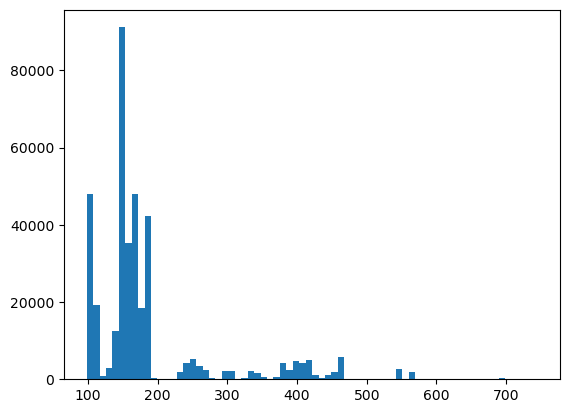

In [30]:


plt.hist(df.tiempo_de_viaje,bins=70)
plt.show()

## P9: Extrae el día, el nombre del día, el mes y la hora de `fecha_inicio`

In [31]:
# Prueba para extraccion de fecha
df.fecha_inicio[0]

Timestamp('2019-06-28 20:36:00')

In [33]:
# podemos utilizar los metodos .day,.month y .hour para extraer dicha informacion en formato numerico, 28, 6, 20 respectivamente teniendo en cuenta el 
# ejemplo de arriba. 
# Pero utilizaremos el metodo strftime() para determinar el dia de la semana, mes y hora concreta (en formato texto) utilizando la nomenclatura 
# aqui descrita (https://strftime.org/) 
print('This train is programed for',
      df.fecha_inicio[0].strftime('%A'),
      df.fecha_inicio[0].day,'th',
      df.fecha_inicio[0].strftime('%B'),
      df.fecha_inicio[0].strftime('%Y'),
      'at',df.fecha_inicio[0].strftime('%H'),':',df.fecha_inicio[0].strftime('%M'))


This train is programed for Friday 28 th June 2019 at 20 : 36


## P10: Quita las columnas `fecha_consulta`, `fecha_inicio` y `fecha_fin` del dataset

In [768]:
df_14=df.copy()
df=df.drop(labels=['fecha_consulta','fecha_inicio','fecha_fin'],axis=1,)

# df_14 es una copia para el ejercicio 14...luego se entiende en dicho ejercicio

In [769]:
df

,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_de_viaje
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0
...,...,...,...,...,...,...,...
383563,MADRID,VALENCIA,AVE,Flexible,Turista,73.10,109.0
383564,BARCELONA,MADRID,AVE,Promo,Preferente,54.45,190.0
383565,VALENCIA,MADRID,AVE,Promo,Turista,27.80,100.0
383566,MADRID,SEVILLA,AVE,Promo,Turista,47.30,141.0


## P11: Lee el dataset `coordenadas_ciudades.csv` y únelo con al dataset que has procesado hasta ahora (utiliza `ciudad_destino` para el `join`)

In [770]:
coordenadas_ciudades= pd.read_csv('data/coordenadas_ciudades.csv')
coordenadas_ciudades

,ciudad,latitud,longitud
0,MADRID,40.416705,-3.703582
1,BARCELONA,41.382894,2.177432
2,SEVILLA,37.388630,-5.995340
3,VALENCIA,39.469901,-0.375951
4,PONFERRADA,42.545412,-6.593872


In [771]:
# hacemos mediante el metodo .merge() un join con la tabla coordenadas. Usaremos un left join(mantendremos todas las columnas de la tabla original df y añadiremos dos
# nuevas columnas 'latitud' y 'longitud' desde la tabla coordenadas a df. Especificamos con los argumentos left_on y rigth_on las columnas de coincidencia (ya que las
# columnas ciudad y ciudad destino no tienen el mismo nombre)
df= df.merge(coordenadas_ciudades,how='left',left_on='ciudad_destino',right_on='ciudad')
df


,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_de_viaje,ciudad,latitud,longitud
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,MADRID,40.416705,-3.703582
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,MADRID,40.416705,-3.703582
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,MADRID,40.416705,-3.703582
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,MADRID,40.416705,-3.703582
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,BARCELONA,41.382894,2.177432
...,...,...,...,...,...,...,...,...,...,...
382190,MADRID,VALENCIA,AVE,Flexible,Turista,73.10,109.0,VALENCIA,39.469901,-0.375951
382191,BARCELONA,MADRID,AVE,Promo,Preferente,54.45,190.0,MADRID,40.416705,-3.703582
382192,VALENCIA,MADRID,AVE,Promo,Turista,27.80,100.0,MADRID,40.416705,-3.703582
382193,MADRID,SEVILLA,AVE,Promo,Turista,47.30,141.0,SEVILLA,37.388630,-5.995340


## P12: Gráfica en un mapa el precio medio por ciudad de destino

In [772]:
# descubrí la maravilla del groupby, creamos una df para procesamiento del mapa mas facil incluyento las coordenadas:
# Ahora ya tenemos una lista de ciudades y coordenadas y las asociaremos por medio de un merge en una tabla con el precio medio
df_map=df.groupby('ciudad_destino')['precio'].mean().round(2).reset_index()
df_map


,ciudad_destino,precio
0,BARCELONA,85.36
1,MADRID,60.70
2,PONFERRADA,45.65
3,SEVILLA,58.82
4,VALENCIA,42.64


In [773]:
df_map=df_map[['ciudad_destino','precio']]
df_map=df_map.merge(coordenadas_ciudades,how='left',left_on='ciudad_destino',right_on='ciudad')
df_map

,ciudad_destino,precio,ciudad,latitud,longitud
0,BARCELONA,85.36,BARCELONA,41.382894,2.177432
1,MADRID,60.70,MADRID,40.416705,-3.703582
2,PONFERRADA,45.65,PONFERRADA,42.545412,-6.593872
3,SEVILLA,58.82,SEVILLA,37.388630,-5.995340
4,VALENCIA,42.64,VALENCIA,39.469901,-0.375951


In [774]:
# Cambiamos el nombre de la columna para mejorar la presentación del mapa 
df_map.rename(columns={'precio':'precio_medio'},inplace=True)

In [775]:
apikey = 'c9fe15c792804d66bbb650deb251abb5'

# importamos datos usando folium y la maravillosa utilidad de los customs tiles  y ajustamos parametros.


mapa = folium.Map(
    location=[40.416705, -3.703582],
    tiles=f'https://{{s}}.tile.thunderforest.com/spinal-map/{{z}}/{{x}}/{{y}}.png?apikey={apikey}',
    attr='&copy; <a href="http://www.thunderforest.com/">Thunderforest</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
    maxZoom=22,
    zoom_start=6)


for idx, row in df_map.iterrows():
    folium.Circle(
        location=(row["latitud"], row["longitud"]),
        radius=row["precio_medio"] *600,
        # Aqui en radius he intentado imputar la operacion para sacar el precio medio pero me daba error siempre.
        #  Se podria poner sin tener que crear una columna nueva llamada 'precio_medio'?
        fill=True,
        fill_opacity=1,
        color="red",
        tooltip=f"""
        <ul>
            <li>City: {row["ciudad_destino"]}</li>
            <li>Price: {row["precio_medio"]}</li>
        </ul>
        """
       
    ).add_to(mapa)
mapa

# ase caloh eh killo

## P13: Haz una tabla de correlación, ¿hay variables númericas correladas con el precio?

In [776]:
# creamos un df aislando las variables numericas que nos interesan analizar con la correlacion.

df_corr= df[['precio','tiempo_de_viaje']]
df_corr

,precio,tiempo_de_viaje
0,67.20,158.0
1,107.70,190.0
2,47.30,150.0
3,28.35,460.0
4,66.75,179.0
...,...,...
382190,73.10,109.0
382191,54.45,190.0
382192,27.80,100.0
382193,47.30,141.0


In [777]:
df_corr.corr()

# observamos una correlacion negativa de asociaion mediana (entre 0.1 y 0.3). Esto se traduce que cuando una aumenta la otra disminuye ligeramente? vamos a hacer un scatter plot para
# verlo

,precio,tiempo_de_viaje
precio,1.000000,-0.226549
tiempo_de_viaje,-0.226549,1.000000


<Axes: xlabel='precio', ylabel='tiempo_de_viaje'>

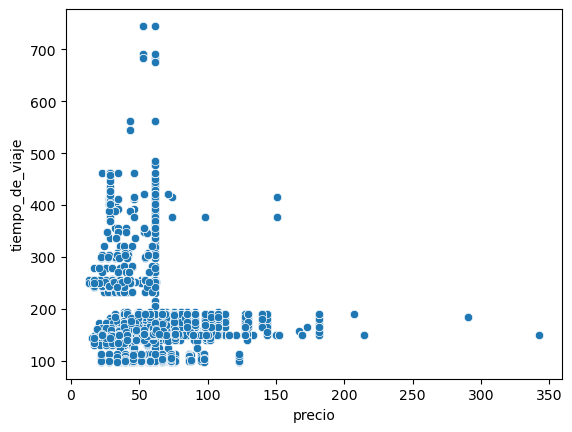

In [778]:

sns.scatterplot(data=df_corr,x='precio',y='tiempo_de_viaje')

# ahora tenemos un poquito mas de vision sobre la relacion de las dos variables y podemos afirmar que existen 2 clusters...intuyo que deberiamos relacionarlo con el tipo de 
# tren (AVE, cercanias, regional...)

# ME HUBIERA GUSTADO PINTAR LA LINEA DE LA CORRELACION SOLO POR CURIOSIDAD, PERO NO HE PODIDO. SE PUEDE HACER?

## P14: Relación entre variables del dataset y `precio`

### P14.1: Haz un scatter plot de precio vs. tiempo de viaje

<Axes: xlabel='precio', ylabel='tiempo_de_viaje'>

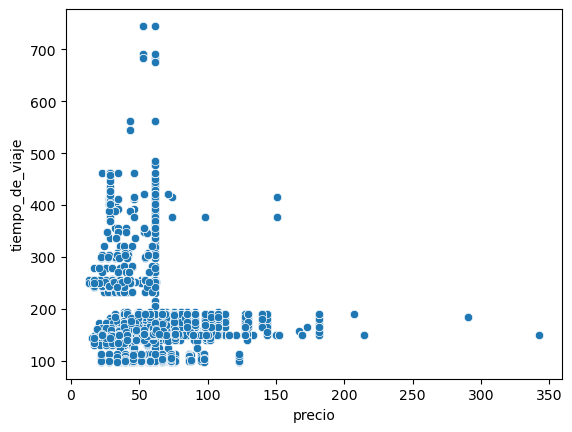

In [779]:
sns.scatterplot(data=df_corr,x='precio',y='tiempo_de_viaje')

### P14.2: Haz un boxplot de precio vs. dia de la semana

In [780]:
'''
sns.boxplot(data=df,x=JAJA,y='precio')
'''
# pero no habiamos quedado en eliminar esa variable?
# vamos a ver qué puedo hacer, voy a cacharrear...recordando el ejercicio 10 donde eliminamos las columnas de tiempo, hemos rescatado una copia antes de eliminarlas 
# y almacenadas en df_14
df_14



,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_de_viaje
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0
...,...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10,109.0
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45,190.0
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80,100.0
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30,141.0


<Axes: xlabel='dia_semana', ylabel='precio'>

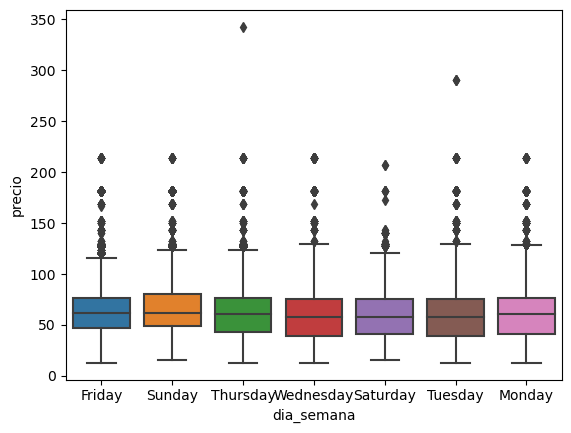

In [781]:
df_14['dia_semana']=df_14.fecha_inicio.dt.strftime('%A')
# vamos a crear una nueva columna almacenando el dia de la semana en concreto para poder cruzar los datos dia VS precio
# y ahora si...
sns.boxplot(data=df_14,x='dia_semana',y='precio')

### P14.3: Gráfica el precio medio por día de la semana

In [782]:
# Sacamos de df_14 un DF que extraiga el dia de la semana por el precio medio:
df_14_3=df_14.groupby('dia_semana')['precio'].mean().reset_index()
df_14_3

,dia_semana,precio
0,Friday,65.377658
1,Monday,61.050589
2,Saturday,57.913801
3,Sunday,67.219011
4,Thursday,60.748076
5,Tuesday,58.019438
6,Wednesday,59.149415


<Axes: xlabel='dia_semana', ylabel='precio'>

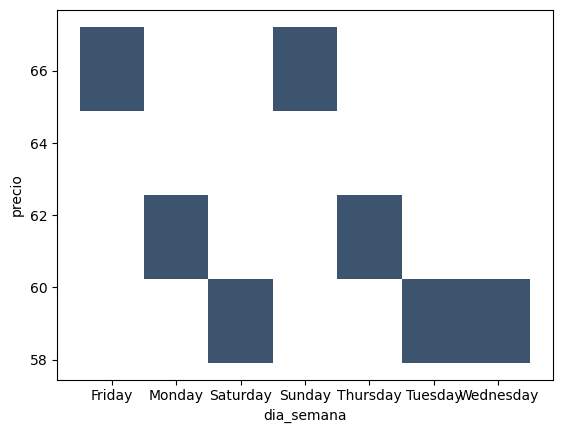

In [783]:
# graficamos el precio medio por dia de la semana:
sns.histplot(data=df_14_3,x='dia_semana',y='precio',)

# no se, no me esperaba la represetnacion asi pero podria cuadrarme, viernes y domingo son los billetes mas caros

## P15: Crea un nuevo dataframe donge apliques *one-hot-encoding* a las variables categoricas

In [784]:
ohe=pd.get_dummies(df)
ohe

,precio,tiempo_de_viaje,latitud,longitud,ciudad_origen_BARCELONA,ciudad_origen_MADRID,ciudad_origen_PONFERRADA,ciudad_origen_SEVILLA,ciudad_origen_VALENCIA,ciudad_destino_BARCELONA,...,clase_Turista,clase_Turista Plus,clase_Turista PlusSólo plaza H,clase_Turista con enlace,clase_TuristaSólo plaza H,ciudad_BARCELONA,ciudad_MADRID,ciudad_PONFERRADA,ciudad_SEVILLA,ciudad_VALENCIA
0,67.20,158.0,40.416705,-3.703582,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
1,107.70,190.0,40.416705,-3.703582,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,47.30,150.0,40.416705,-3.703582,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,28.35,460.0,40.416705,-3.703582,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
4,66.75,179.0,41.382894,2.177432,False,True,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382190,73.10,109.0,39.469901,-0.375951,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
382191,54.45,190.0,40.416705,-3.703582,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
382192,27.80,100.0,40.416705,-3.703582,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
382193,47.30,141.0,37.388630,-5.995340,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
